## Introduction

On the following pages is an exercise to give you a flavor of topics which will concern you as a Privacy Hub data analyst. Your answers will show us something of the way you work and think as well as how well you communicate. When in doubt about how to proceed, please use your best judgment. We do require that your answers are entirely your own work and that you cite where any external resources are used.

Your answers should include the code used to produce your findings. Where you describe your findings, do so in a non-technical way, being careful with wording. The reader should not need to execute your code to see your answers.

Good luck!

## Technical Instructions

The remainder of this notebook is divided into 2 sections. Section 1 consists of questions for you to answer directly in the notebook. Your submission should consist of an html or pdf export of this notebook. Send your results by attaching them in an email to the address that you received this exercise from.

Section 2 consists of an appendix that will be referenced in Section 1.

### Personal Hobbies

The following questions involve working with the dataset that was sent with this notebook. This is toy data which has been created within Privacy Hub and does not reflect any real people. The dataset includes a number of variables relating to physical attributes, hobbies and a ‘token’ which is used to distinguish one patient from another. A token is a value which is created from any one or more input values. It looks nonsensical (as it is a ‘hash’) and cannot be re-engineered to the original value. An example is provided alongside a more detailed explanation in the Appendix.

This data has been sent to you from a prospective client who intends to use the data for some analyses on inferring hobby trends across different demographics. The client has informed you that the tokens are created using data within the dataset itself, which is encrypted using a robust and trusted algorithm.

For the following questions, where appropriate, use code and language that is concise, efficient, easy-to-read and annotated to explain what’s going on. Where a question is open-ended, it is encouraged that you are succinct in your explanation.

a) Using the dataset and information above, determine which variables have been used to create the token. Can you comment on how this token might be improved?

b) Calculate the average weight for a person with blue eyes aged between 20 and 50 (inclusive). (Assume every row represents a unique individual).

c) Comment on the distribution of values within the height column, can you explain why there may be such a wide range of values? (hint: it may be useful to research real height distributions in the human population).

d) Notice that row 12 (incl. header) begins to shift columns to the left and leads to misalignment. Further queries reveal that this is an error due to missing age information during manual data entry. Given the format of the file, can you identify a simple fix to ensure this misalignment doesn’t happen and formatting remains consistent?

e) The client wishes to use the dataset partly to analyze the relationship between sex and favorite hobby. Comment on any pre-processing steps you think are necessary before performing such analysis.

f) Upon further conversation, the client reveals to you that the dataset provided is a sample of a larger dataset, which consists of 100,000 unique individuals.

    i) Comment on the validity of using this data sample to draw any statistical conclusions about the entire dataset  
    ii) What advice would you give the client should they ask how best to prepare a data sample?

g) Part of our work at Privacy Hub invovles applying industry-standard guidance to various real life use cases. Such guidance often takes the form of modifications to a dataset in the name of reducing risk of re-identification. Briefly describe how you would implement the following modifications.

    i) Height must be capped at 183cm for females and 198cm for males.
    ii) All marital status values present must be limited to one of: "Married", "Single", "Divorced", "Widowed", or "Unknown". Furthermore, marital status must not be present for patients under 30.

### Appendix

To illustrate the tokenisation process, consider the data found in the table below. To create the associated tokens, the variables var1 and var2 have been fed into a tokenization engine. Thus, rows with the same entries in both these variables have the same tokens, despite potentially representing different individuals (this is known as token colliding (or clashing)).

| var1 | var2 | token     |
|------|------|-----------|
| A    | X    | 2fw4hcl7  |
| A    | Y    | oa3t6saj  |
| B    | X    | a56plm9   |
| A    | X    | 2fw4hcl7  |


In [84]:
import pandas as pd
file_path = 'DA_TaskSheet_Hobbies.txt'

# Read the file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t')  

# Display the first few rows of the DataFrame to verify
df.head()


,token name surname sex age height weight.kg eyecolour test.group hobbies marstat
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...
2,199083b48a273f2a7fb004f0223f865369737360a1b418...
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...


In [85]:
num_rows, num_columns = df.shape
print(df.shape)

(25, 1)


In [86]:
# Read the file into a DataFrame with a custom delimiter and column names
df = pd.read_csv(file_path, delimiter=' ', names=['Token', 'Name', 'Surname', 'Sex', 'Age', 'Height', 'Weight(kg)', 'EyeColor', 'Test Group', 'Hobbies', 'Marital Status'])
df = df.drop(0).reset_index(drop=True)

df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,male,31,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,female,23,152.0,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,M,28,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29,66.5,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,F,24,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,M,32,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,female,18,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,male,28,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [87]:
#Data type of each column
data_type = df.dtypes
data_type

Token             object
Name              object
Surname           object
Sex               object
Age               object
Height            object
Weight(kg)        object
EyeColor          object
Test Group        object
Hobbies           object
Marital Status    object
dtype: object

In [88]:
# Reassign data types for the specified columns
df['Token'] = df['Token'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Surname'] = df['Surname'].astype(str)
df['Sex'] = df['Sex'].astype(str)
df['EyeColor'] = df['EyeColor'].astype(str)
df['Hobbies'] = df['Hobbies'].astype(str)
df['MaritalStatus'] = df['Marital Status'].astype(str)
df['Age'] = df['Age'].astype(float)
df['Height'] = df['Height'].astype(float)
df['Weight(kg)'] = df['Weight(kg)'].astype(float)
df['Test Group'] = df['Test Group'].astype(int)

# Display the updated data types of each column
updated_data_types = df.dtypes
print(updated_data_types)

<class 'ValueError'>: could not convert string to float: 'brown'

In [89]:
data_type


Token             object
Name              object
Surname           object
Sex               object
Age               object
Height            object
Weight(kg)        object
EyeColor          object
Test Group        object
Hobbies           object
Marital Status    object
dtype: object

In [90]:
# Filter rows where 'Name' or 'Surname' contains numeric values
numeric_name_surname_df = df[df['Name'].str.contains('\d') | df['Surname'].str.contains('\d')]
print(numeric_name_surname_df[['Name', 'Surname']])


Empty DataFrame
Columns: [Name, Surname]
Index: []


In [91]:
# Display unique values in the 'Sex' column
unique_sex_values =df['Sex'].unique()
unique_sex_values

array(['male', 'female', 'M', 'Female', 'F', 'Male', '23'], dtype=object)

In [92]:
# Replace various gender values with 'Male'
gender_mapping = {'M': 'Male', 'm': 'Male', 'Male': 'Male', 'male': 'Male'}
gender_mapping = {'F': 'Female', 'f': 'Female', 'Female': 'Female', 'female': 'Female'}

df['Sex'].replace(gender_mapping, inplace=True)
unique_sex_values = df['Sex'].unique()
print(unique_sex_values)

['male' 'Female' 'M' 'Male' '23']


In [93]:

df.drop(columns=['MaritalStatus'], inplace=True)
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,male,31.00,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.00,152.00,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,M,28.00,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.00,66.50,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.00,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.00,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.00,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,M,32.00,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.00,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,male,28.00,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [94]:
#Filtering rows with 'Sex' contain '23'
print(df[df['Sex']=='23'])

                                                Token   Name    Surname Sex  \
10  a65d0b6a688ccd71c39fb5ea176f637f25fd0af79604e4...  Peter  Johnstone  23   

     Age  Height Weight(kg) EyeColor                        Test Group  \
10  1.78    87.1      brown        3  keen cricketer and tennis player   

   Hobbies Marital Status  
10     nan            NaN  


In [95]:
import numpy as np

# Identify the row where 'Sex' contains '23'
row_index = df[df['Sex'] == '23'].index[0]

# Redefine the values for the identified row
df.loc[row_index, ['Sex', 'Age', 'Height', 'Weight(kg)', 'EyeColor', 'Test Group', 'Hobbies', 'Marital Status']] = [np.nan, 23, 10, 87.1, 'brown', 3, 'keen cricketer and tennis player', np.nan]

# Display the updated row
print(df.iloc[row_index])


Token             a65d0b6a688ccd71c39fb5ea176f637f25fd0af79604e4...
Name                                                          Peter
Surname                                                   Johnstone
Sex                                                             NaN
Age                                                            23.0
Height                                                         10.0
Weight(kg)                                                     87.1
EyeColor                                                      brown
Test Group                                                        3
Hobbies                            keen cricketer and tennis player
Marital Status                                                  NaN
Name: 10, dtype: object


In [96]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,M,28.0,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,M,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [97]:
df


,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,M,28.0,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,M,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [98]:
# Replace various gender values with 'Male' and 'Female'
gender_mapping = {'M': 'Male', 'm': 'Male', 'Male': 'Male', 'male': 'Male', 'F': 'Female', 'f': 'Female', 'Female': 'Female', 'female': 'Female'}

df['Sex'].replace(gender_mapping, inplace=True)
unique_sex_values = df['Sex'].unique()
print(unique_sex_values)


['Male' 'Female' nan]


In [99]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [100]:
# Reassign data types for the specified columns
df['Token'] = df['Token'].astype(str)
df['Name'] = df['Name'].astype(str)
df['Surname'] = df['Surname'].astype(str)
df['Sex'] = df['Sex'].astype(str)
df['EyeColor'] = df['EyeColor'].astype(str)
df['Hobbies'] = df['Hobbies'].astype(str)
df['MaritalStatus'] = df['Marital Status'].astype(str)
df['Age'] = df['Age'].astype(float)
df['Height'] = df['Height'].astype(float)
df['Weight(kg)'] = df['Weight(kg)'].astype(float)
df['Test Group'] = df['Test Group'].astype(int)

# Display the updated data types of each column
updated_data_types = df.dtypes
print(updated_data_types)

Token              object
Name               object
Surname            object
Sex                object
Age               float64
Height            float64
Weight(kg)        float64
EyeColor           object
Test Group          int32
Hobbies            object
Marital Status     object
MaritalStatus      object
dtype: object


In [101]:
# Find the min and max values for Age, Height, Weight(kg), and Test Group
min_age = df['Age'].min()
max_age = df['Age'].max()

min_height = df['Height'].min()
max_height = df['Height'].max()

min_weight = df['Weight(kg)'].min()
max_weight = df['Weight(kg)'].max()

min_test_group = df['Test Group'].min()
max_test_group = df['Test Group'].max()

# Display the results
print("Age - Min:", min_age, "Max:", max_age)
print("Height - Min:", min_height, "Max:", max_height)
print("Weight(kg) - Min:", min_weight, "Max:", max_weight)
print("Test Group - Min:", min_test_group, "Max:", max_test_group)


Age - Min: 18.0 Max: 72.0
Height - Min: 1.45 Max: 180.0
Weight(kg) - Min: 42.6 Max: 96.6
Test Group - Min: 1 Max: 5


In [102]:
#Sort 'Height' column in decending order
sorted_height= df['Height'].sort_values(ascending = False)
print(sorted_height)

24    180.00
1     152.00
22    150.00
18    145.00
3      66.50
21     64.30
23     64.00
11     61.80
10     10.00
15      1.93
12      1.90
7       1.83
9       1.81
0       1.81
14      1.80
17      1.79
2       1.79
16      1.77
6       1.76
19      1.75
13      1.64
8       1.53
5       1.48
4       1.46
20      1.45
Name: Height, dtype: float64


In [103]:
# Display unique eye colour in the 'EyeColor' column

unique_EyeColor =df['EyeColor'].unique()
unique_EyeColor

array(['blue', 'brown', 'hazel', 'green'], dtype=object)

In [104]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status,MaritalStatus
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married,married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married,Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing,sing


In [105]:
df.drop(columns=['MaritalStatus'], inplace=True)
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",Married
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,sing


In [106]:
print(df.shape)

(25, 11)


In [107]:
# Display unique eye colour in the 'EyeColor' column

unique_Marital_Status =df['Marital Status'].unique()
unique_Marital_Status

array(['married', 'single', 'divorced', 'widowed', 'Married', 'sing', nan],
      dtype=object)

In [108]:
Married_mapping = {'Married': 'married', 'sing':'single'}
df['Marital Status'].replace(Married_mapping,inplace = True)
df['Marital Status'].unique()

array(['married', 'single', 'divorced', 'widowed', nan], dtype=object)

b) Calculate the average weight for a person with blue eyes aged between 20 and 50 (inclusive). (Assume every row represents a unique individual)

In [109]:
#Filter rows based on age and eye colour
blue_eye_age_20_50 = df[(df['EyeColor']=='blue') & (df['Age'] >= 20) & (df['Age'] <= 50)]
blue_eye_age_20_50

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",married
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,single
16,bfff735ddf3ce73d4ca5251e752234ebd33378d2565741...,Caroline,Jones,Female,45.0,1.77,73.8,blue,4,Likes walking her two dogs in the country,widowed
17,ede9e98407b47943eaccc3d3b42ae25b801e24b30bb8fc...,Susan,Frank,Female,23.0,1.79,42.6,blue,4,Swims for her region. Currently injured.,single


In [110]:
#Calculate average_weight
average_weight_blue_eye_age_20_50 = blue_eye_age_20_50['Weight(kg)'].mean()
print(f"The average weight for a person with blue eyes aged between 20 and 50 is {average_weight_blue_eye_age_20_50:.2f} kg")


The average weight for a person with blue eyes aged between 20 and 50 is 72.74 kg


c) Comment on the distribution of values within the height column, can you explain why there may be such a wide range of values? (hint: it may be useful to research real height distributions in the human population).

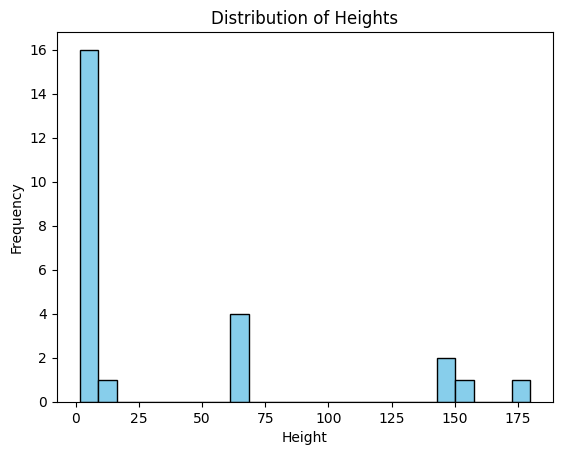

In [111]:
import matplotlib.pyplot as plt

# Plotting histogram for the 'Height' column
plt.hist(df['Height'], bins=24, color='skyblue', edgecolor='black')

plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Heights')

# Display the histogram
plt.show()


In [112]:
df['Height'].sort_values(ascending=False)

24    180.00
1     152.00
22    150.00
18    145.00
3      66.50
21     64.30
23     64.00
11     61.80
10     10.00
15      1.93
12      1.90
7       1.83
9       1.81
0       1.81
14      1.80
17      1.79
2       1.79
16      1.77
6       1.76
19      1.75
13      1.64
8       1.53
5       1.48
4       1.46
20      1.45
Name: Height, dtype: float64

The dataset reveals a diverse distribution of height measurements, ranging from a minimum of 1.45 to a maximum of 180.00. However, these values appear to cluster together rather than being evenly dispersed. In contrast, real-world human height data, as indicated by sources like "https://ourworldindata.org/human-height," typically demonstrates a Gaussian curve, signifying a more balanced distribution.

The dataset's limited sample size, comprising only 24 individuals, hinders drawing definitive conclusions about the observed wide range of values. This variability may be influenced by factors such as the inclusion of very young children to exceptionally tall individuals in the dataset. The restricted sample size restricts the ability to make broader statements about the general population.

Another potential contributing factor to the wide range of values is the absence of a consistent unit of measurement for height in the dataset. If, for instance, heights were measured in different units (e.g., centimeters and meters), it could result in a broader spread of data. Clarifying and standardizing the unit of measurement would contribute to a more accurate analysis of the height distribution within the dataset.

In [125]:
# Assuming 'height_list' is your existing list of heights
height_list = df['Height'].tolist()

# Create a new list with heights above 9 divided by 100
# This division is to address potential conversion errors, assuming values above 9 are in a different unit (e.g., centimeters)

new_height_list = [height / 100 if height > 9 else height for height in height_list]

# Display the new list
print(new_height_list)


[1.81, 1.52, 1.79, 0.665, 1.46, 1.48, 1.76, 1.83, 1.53, 1.81, 0.1, 0.618, 1.9, 1.64, 1.8, 1.93, 1.77, 1.79, 1.45, 1.75, 1.45, 0.643, 1.5, 0.64, 1.8]


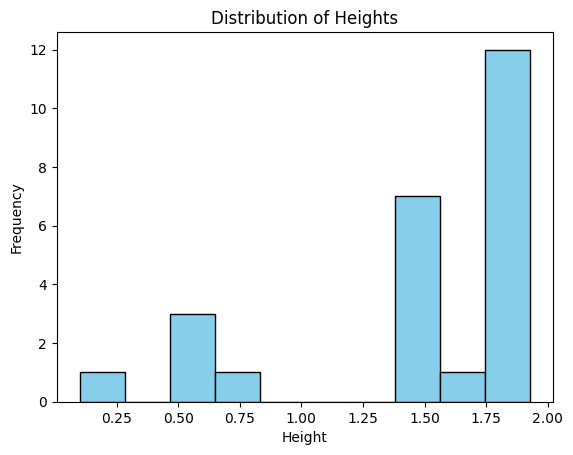

In [124]:
import matplotlib.pyplot as plt

# Plotting histogram for the 'Height' column

plt.hist(new_height_list, bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Distribution of Heights')

# Display the histogram
plt.show()


d)	Notice that row 12 (incl. header) begins to shift columns to the left and leads to misalignment. Further queries reveal that this is an error due to missing age information during manual data entry. Given the format of the file, can you identify a simple fix to ensure this misalignment doesn’t happen and formatting remains consistent?

When working with our dataset, it's important to make sure that each column has the right kind of information. For example, 'Age' should have whole numbers, 'Height' and 'Weight(kg)' should have decimal numbers, and 'Sex' should only be certain categories. This helps us quickly see if there are any unexpected data types in the columns.

Cleaning the data is also crucial. This means getting rid of any empty rows, checking that numbers like 'Age', 'Height', and 'Weight(kg)' make sense, and dealing with any strange values, called outliers.

To make sure people enter data consistently, we should try to improve how we manually enter data. This could mean adding checks to stop incorrect or out-of-range values. Giving clear instructions and tools like dropdown lists during data entry can help avoid common mistakes.

To make data entry even more consistent, it could be useful to only allow certain types of values for each column. For example, only allowing specific words for 'Sex' or 'EyeColor', and only accepting numbers for 'Age', 'Height', and 'Weight(kg)'. This helps keep the data correct and prevents the wrong types of information being added.

Also, having a way to automatically put 'NaN' or empty values when someone forgets to add data would be handy. This makes sure that missing information is always shown in the dataset, making it easier to spot and handle during data analysis. Combining these ideas can make our dataset stronger and more accurate.


In [115]:
df['Hobbiessss'] = df['Hobbies'].str.lower().str.strip().str.split()


In [116]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status,Hobbiessss
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married,"[plays, cricket,, football, and, rugby]"
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single,"[keen, potter, and, home, cook]"
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single,"[likes, e-games]"
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married,"[has, a, horse, and, regularly, rides]"
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced,"[spends, most, free, time, with, friends, and,..."
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married,"[prefers, indoor, pursuits, like, reading]"
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed,"[plays, bowls, twice, a, week]"
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",married,"[likes, backpacking,, climbing, and, canoeing]"
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed,"[plays, tennis, for, her, county;, yorkshire]"
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,single,"[enjoys, swimming, and, eating, out, with, his..."


In [117]:
df['Hobbiessss']

0               [plays, cricket,, football, and, rugby]
1                       [keen, potter, and, home, cook]
2                                      [likes, e-games]
3                [has, a, horse, and, regularly, rides]
4     [spends, most, free, time, with, friends, and,...
5            [prefers, indoor, pursuits, like, reading]
6                        [plays, bowls, twice, a, week]
7        [likes, backpacking,, climbing, and, canoeing]
8         [plays, tennis, for, her, county;, yorkshire]
9     [enjoys, swimming, and, eating, out, with, his...
10               [keen, cricketer, and, tennis, player]
11            [likes, jigsaw, puzzles, and, needlework]
12              [says, he, has, no, time, for, hobbies]
13     [likes, growing, vegetables, in, her, allotment]
14                  [likes, cooking, and, watching, tv]
15    [plays, the, violin, and, is, a, member, of, a...
16    [likes, walking, her, two, dogs, in, the, coun...
17      [swims, for, her, region., currently, in

In [118]:
import pandas as pd

# If 'Hobbies' column has missing values, fill them with 'Unknown'
df['Hobbies'].fillna('Unknown', inplace=True)

# Create a new DataFrame with 'Hobbies' and 'Sex'
hobbies_sex_df = df[['Hobbies', 'Sex']]

# Convert 'Hobbies' to lowercase, split into words, and explode the list
hobbies_sex_df['Hobbies'] = hobbies_sex_df['Hobbies'].str.lower().str.split()
hobbies_sex_df = hobbies_sex_df.explode('Hobbies')

# Count the word frequencies for all, male, and female
word_counts_all = hobbies_sex_df['Hobbies'].value_counts()
word_counts_male = hobbies_sex_df[hobbies_sex_df['Sex'] == 'Male']['Hobbies'].value_counts()
word_counts_female = hobbies_sex_df[hobbies_sex_df['Sex'] == 'Female']['Hobbies'].value_counts()

print("Word Frequencies for All:")
print(word_counts_all)

print("\nWord Frequencies for Male:")
print(word_counts_male)

print("\nWord Frequencies for Female:")
print(word_counts_female)


<ipython-input-118-eb7764c6464a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hobbies_sex_df['Hobbies'] = hobbies_sex_df['Hobbies'].str.lower().str.split()


Word Frequencies for All:
and             11
likes            8
a                6
plays            5
with             5
                ..
county;          1
canoeing         1
climbing         1
backpacking,     1
weekly.          1
Name: Hobbies, Length: 95, dtype: int64

Word Frequencies for Male:
and             6
enjoys          4
likes           4
a               4
plays           3
member          2
of              2
his             2
with            2
playing         1
cycling         1
the             1
violin          1
is              1
youth           1
orchestra       1
club.           1
dog.            1
also            1
watching        1
sailing.        1
reading         1
fiction         1
non-fiction.    1
volleyball      1
country         1
walks           1
tv              1
time            1
cooking         1
hobbies         1
football        1
rugby           1
e-games         1
bowls           1
twice           1
week            1
backpacking,    1
climbing     

In [119]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status,Hobbiessss
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married,"[plays, cricket,, football, and, rugby]"
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single,"[keen, potter, and, home, cook]"
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single,"[likes, e-games]"
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married,"[has, a, horse, and, regularly, rides]"
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced,"[spends, most, free, time, with, friends, and,..."
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married,"[prefers, indoor, pursuits, like, reading]"
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed,"[plays, bowls, twice, a, week]"
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",married,"[likes, backpacking,, climbing, and, canoeing]"
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed,"[plays, tennis, for, her, county;, yorkshire]"
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,single,"[enjoys, swimming, and, eating, out, with, his..."


e)	The client wishes to use the dataset partly to analyze the relationship between sex and favorite hobby. Comment on any pre-processing steps you think are necessary before performing such analysis.
In preparing the dataset for the client's analysis on the correlation between sex and favourite hobbies, several pre-processing steps are essential. Firstly, it's crucial to address any missing data points within the dataset. Whether by filling in gaps or excluding incomplete entries, ensuring a comprehensive dataset is fundamental for accurate analysis.

Next, standardising text data becomes imperative. This involves converting all text to lowercase, ensuring consistency and avoiding discrepancies arising from variations in letter cases. Additionally, verifying the 'Sex' column is essential, limiting entries to "Male," "Female," or "NaN" to maintain data integrity.

In terms of the 'Hobbies' column, a thorough cleansing process is necessary. Removing any extraneous characters like apostrophes, commas, and semicolons ensures a clean and uniform dataset. This step is vital for accurate word counting and subsequent analysis.

After these pre-processing steps, the dataset is better equipped for meaningful analysis of the relationship between sex and favourite hobbies. The data is more reliable, ensuring that any observed correlations are based on accurate and consistent information.


f) Upon further conversation, the client reveals to you that the dataset provided is a sample of a larger dataset, which consists of 100,000 unique individuals.
i) Comment on the validity of using this data sample to draw any statistical conclusions about the entire dataset  
In considering the validity of the sample provided by the client, it is crucial to assess the sampling process. If the sample is representative of the larger dataset and selected using randomized techniques, the statistical conclusions drawn from the sample can be confidently applied to the entire dataset. However, if there is bias in the sampling method, such as non-random selection or representation of only specific groups, the conclusions may not be generalizable to the entire dataset.
ii) What advice would you give the client should they ask how best to prepare a data sample?
If the client seeks advice on preparing a data sample, I would recommend opting for a larger sample size with an equal probability of being selected, ensuring it is representative of the entire population. A larger sample size tends to yield more accurate reflections of the data. Additionally, thorough data cleaning before any analysis is essential to address missing values, outliers, and inconsistencies. Documenting the sampling methodology and ensuring transparency in data handling are crucial. This includes documenting the sampling method and maintaining transparency in data handling. Data validation should also be a priority, ensuring that repeating the same procedure yields consistent results. This comprehensive approach contributes to the reliability and robustness of the data sample.


In [120]:
# Update 'Height' for females and Male, capping at 183cm and 198cm respectively

df['Height'] = np.where((df['Sex'] == 'Female') & (df['Height'] > 183), 183, df['Height'])
df['Height'] = np.where((df['Sex'] == 'Male') & (df['Height'] > 198), 198, df['Height'])
df['Height']

0       1.81
1     152.00
2       1.79
3      66.50
4       1.46
5       1.48
6       1.76
7       1.83
8       1.53
9       1.81
10     10.00
11     61.80
12      1.90
13      1.64
14      1.80
15      1.93
16      1.77
17      1.79
18    145.00
19      1.75
20      1.45
21     64.30
22    150.00
23     64.00
24    180.00
Name: Height, dtype: float64

In [121]:
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status,Hobbiessss
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married,"[plays, cricket,, football, and, rugby]"
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,single,"[keen, potter, and, home, cook]"
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,single,"[likes, e-games]"
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,married,"[has, a, horse, and, regularly, rides]"
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,divorced,"[spends, most, free, time, with, friends, and,..."
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,married,"[prefers, indoor, pursuits, like, reading]"
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed,"[plays, bowls, twice, a, week]"
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",married,"[likes, backpacking,, climbing, and, canoeing]"
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,widowed,"[plays, tennis, for, her, county;, yorkshire]"
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,single,"[enjoys, swimming, and, eating, out, with, his..."


In [122]:
# Using np.where to modify 'Marital Status' based on the condition
#np.where(condition, x, y) # IF condition is True then it return x else it return y
df['Marital Status'] = np.where(df['Age'] < 30, np.nan, df['Marital Status'])
df

,Token,Name,Surname,Sex,Age,Height,Weight(kg),EyeColor,Test Group,Hobbies,Marital Status,Hobbiessss
0,29ef6f59fd9ac01e32b96a2deb31468cead3da1e55217b...,David,Stephens,Male,31.0,1.81,96.6,blue,1,"Plays cricket, football and rugby",married,"[plays, cricket,, football, and, rugby]"
1,b4b0039ae6874154757388eb58f07030f0f7d1c08df10d...,Karen,Bain,Female,23.0,152.00,45.4,brown,1,Keen potter and home cook,NaN,"[keen, potter, and, home, cook]"
2,199083b48a273f2a7fb004f0223f865369737360a1b418...,Asaf,Fry,Male,28.0,1.79,74.4,brown,1,Likes e-games,NaN,"[likes, e-games]"
3,063561ac27a4b06062fcdd489ce25eab82fd5bd80fe76f...,Jill,Bain,Female,29.0,66.50,60.9,brown,1,Has a horse and regularly rides,NaN,"[has, a, horse, and, regularly, rides]"
4,7b665b53188c13e41731dd0e55799b6b8d999819999d10...,Fiona,Bain,Female,19.0,1.46,79.2,blue,1,Spends most free time with friends and family,NaN,"[spends, most, free, time, with, friends, and,..."
5,9404f142e65be3d93018e1ee87bf3e56dfdc21f9307501...,Natasha,Fry,Female,24.0,1.48,79.3,brown,2,Prefers indoor pursuits like reading,NaN,"[prefers, indoor, pursuits, like, reading]"
6,6e258a34e333bb551fb5b5d668954e0eb99772ac7ab784...,Jack,Rogers,Male,62.0,1.76,81.7,blue,2,Plays bowls twice a week,widowed,"[plays, bowls, twice, a, week]"
7,948039ec6cce186762f21614f380485fc318b7d5639b4d...,Lee,Connor,Male,32.0,1.83,69.0,blue,2,"Likes backpacking, climbing and canoeing",married,"[likes, backpacking,, climbing, and, canoeing]"
8,57766529a3ec63fa4f6830857058f56df44eb1b4cad375...,Anastasia,Stuart,Female,18.0,1.53,79.2,blue,2,Plays tennis for her county; Yorkshire,NaN,"[plays, tennis, for, her, county;, yorkshire]"
9,18acf70a4501f571a896ecc42e0cd6978a4ac3f8b06281...,Kevin,Armstrong,Male,28.0,1.81,81.7,blue,2,enjoys swimming and eating out with his wife,NaN,"[enjoys, swimming, and, eating, out, with, his..."


g) Part of our work at Privacy Hub invovles applying industry-standard guidance to various real life use cases. Such guidance often takes the form of modifications to a dataset in the name of reducing risk of re-identification. Briefly describe how you would implement the following modifications.
i) Height must be capped at 183cm for females and 198cm for males.
Initially, I would standardise the "Sex" column to ensure consistent notation, eliminating any variations such as 'male' and 'female'. Following this, I would create a modified dataframe that follows to the specified criteria. Subsequently, I would proceed to apply thorough analysis and modelling to derive meaningful insights from the refined dataset.
	ii) All marital status values present must be limited to one of: "Married", "Single", "Divorced", "Widowed", or "Unknown". Furthermore, marital status must not be present for patients under 30.
To implement this modification, we can employ conditional formatting to change the marital status to "NaN" for individuals under the age of 30.
